# Assignment # 2 : Data Exploration & Visualization.
## Data Science 350
This is the my second stab at this data set wherein the goal is to find atleast three interesting relationships between the variables to better understand the efficiency of the buildings captured in the dataset.
- Standard deviation of Heating.Load and Cooling.Load are way off from their respective means, this would convey a skewed distribution.
- Using Z-score normalization you can confirm the low percentage of homes with a high z-score and high percentage of homes with a low z-score, this would conclude that there will be few homes with high energy bills.
- Heating.load and Cooling.load are most strongly correlated to Overall Height of the house. I have shown this strong relationship by calculating pearson's correlation using cor function, I have also displayed this visually using a box plot between Heating Load and Overall Height.
- Orientation and Heating.load have no relationship this can be confirmed by cor function, box and Violin plot.
- Wall.Area and Heating.Load are moderately correlated.
- Bar plot clearly shows you that wall area between 294 & 318.5 is most prevalent in the homes.
- Plot a histogram of z-score normalization of Heating.load and observe the distribution. A positive skewed distribution can be confirmed with a slope going down from -1 to 2. One can confirm that approximately 400 homes will be paying less than average heating bills.
- Plot a histogram of z-score normalized Cooling.load and observe the distribution. A positive skewed distribution can be confirmed with a slope going down from -1 to 2. One can confirm that approximately 393 homes will be paying less than average cooling bills.
- I have question multiple questions on outliers which I have asked throughout the notebook.
- Using color aesthetic we can show Surface area has a negative correlation with Heating load and overall height has a strong positive correlation with Heating load. Plotting all three on the same plot shows us a high surface area of 808.5 with a low heating load, and the same low heating load shows up on the low overall height due to strong positive correlation. 
- Using color aesthetic we can show Relative compactness has a good correlation with Heating load and we can see heating load going up and as the compactness is increasing.Roof area has a negative correlation with heating load and it is evident on the plot with a higher roof area showing up against lower heating load.
- I have provided correlation visualization using the ellipse package.





## About the data set

This data set is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency).

- **Source**:
The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).


- **Data Set Information**:
We perform energy analysis using 12 different building shapes simulated in Ecotec. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


## Load the data set.

Below I am loading the dataset provided in an csv file to a data frame in R and checking out the original structure.

Execute the code in this cell to load data into your notebook. 

As a good scripting practice, I am also loading all the functions at the start of the code.
Make sure you have the **.csv file** and function **CleanData.R** & **Loaddata.R** in your working directory!.

In [98]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")
# Load the functions.
source("CleanData.R")
source("Loaddata.R")


#Call function to load the csv file.
FileName <- 'EnergyEfficiencyData.csv'
energy.eff = Loaddata(FileName)

#Check out the structure of the original file.
str(energy.eff)

'data.frame':	768 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...
 $ Cooling.Load             : num  21.3 21.3 21.3 21.3 28.3 ...


## Cleanse the data set.
Once the data frame is created I am using a utility function I have created for some rudimentary cleansing wherein I am removing any rows/columns with special characters ('?', '#', '%') as the only data in the field. 

This removal of rows is based on the data volume, at this time I remove such rows if its less than 10% of the complete dataset. 

If above defined special characters are present for more than 90% of the data set then such columns are removed from the dataset as they do not provide any value to the analysis.

After removal of all the above mentioned special characters, I am using a generic function **<span style="color:red">na.omit</span>** to remove any incomplete cases.

Function **<span style="color:red">Clean</span>** will display the details of removed rows and columns affected by special characters.

In [99]:
# Call function to cleanse the dataset off special characters (?,%,#) and NA's.
Cleansedenergy.ff <- Clean(energy.eff)




No monitored special characters were found in the dataset.

In [100]:
#Check out the structure of the cleansed object.
str(Cleansedenergy.ff)

'data.frame':	768 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...
 $ Cooling.Load             : num  21.3 21.3 21.3 21.3 28.3 ...


Some key things to notice here are:

- This dataset has 768 observations with 10 variables.
- There are no discrete variables in this dataset, we can however treat 'Overall.Height' & 'Orientation' as discrete variables as they have finite number of values which I will show below by frequency tables.
- Heating.Load and Cooling.Load variables and are being used to track the efficiency of the homes.
- No special characters ('?', '#', '%') or NA's were found in the dataset. This can be validated by comparing the output of STR function before and after cleansing, there is no change in count of observations and variables.

### Summary statistics
All the columns are num or integer hence we can calculate the summary of the complete dataset using **<span style="color:red">lapply</span>**.

Execute the code in the cell below and note the result.

In [101]:
#All the columns are num or integer hence we can calculate the summary of the complete dataset.
lapply(Cleansedenergy.ff, summary)

$Relative.Compactness
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6200  0.6825  0.7500  0.7642  0.8300  0.9800 

$Surface.Area
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  514.5   606.4   673.8   671.7   741.1   808.5 

$Wall.Area
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  245.0   294.0   318.5   318.5   343.0   416.5 

$Roof.Area
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  110.2   140.9   183.8   176.6   220.5   220.5 

$Overall.Height
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.50    3.50    5.25    5.25    7.00    7.00 

$Orientation
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.75    3.50    3.50    4.25    5.00 

$Glazing.Area
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1000  0.2500  0.2344  0.4000  0.4000 

$Glazing.Area.Distribution
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.750   3.000   2.812   4.000   5.000 

$Heating.Load
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.01   12.99  

This summary provides some useful information:

- Heating.load and cooling.load is reflecting a postive skewed distribution as mean is greater than median.
- 1st QR is considerably different from 3rd QR hence it reflects a skewed distribution.

# Compute the standard deviation of the numeric columns. 
The standard deviation is a measure of the dispursion of a distribution defined as:

$$sd = \sigma = \sqrt{\frac{\Sigma(x_i - \mu)^2}{n-1}}$$

Here $\sigma$ is the standard deviation, $\mu$ is the mean, $\Sigma$ is the symbol for summation and $n$ is number of observations.

The code below applies the $sd$ function to each of the columns of the data frame **Cleansedenergy.ff**. Since a data frame is a list, the **<span style="color:red">lapply</span>**. function is used to iterate the $sd$ function over the list.  

Execute this code and examine the result.

In [102]:
lapply(Cleansedenergy.ff, sd)

$Relative.Compactness
[1] 0.1057775

$Surface.Area
[1] 88.08612

$Wall.Area
[1] 43.62648

$Roof.Area
[1] 45.16595

$Overall.Height
[1] 1.75114

$Orientation
[1] 1.118763

$Glazing.Area
[1] 0.1332206

$Glazing.Area.Distribution
[1] 1.55096

$Heating.Load
[1] 10.0902

$Cooling.Load
[1] 9.513306

**<span style="color:red">Standard deviation of Heating.Load and Cooling.Load are way off from their respective means, this would convey a skewed distribution.<span/>**

### Examine the data frames

Next, we can look the first and last few lines of the data frame using the `head` and `tail` functions. Execute the code in the cells below to examine the first and last few rows of the data frame.

In [103]:
head(Cleansedenergy.ff)

Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [104]:
tail(Cleansedenergy.ff)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
763,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
764,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
765,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
766,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
767,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
768,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


# Analyse Normalized Heating.load and Cooling.load.
Let us now compare both heating.load and cooling.load by standardising them using Z-Score and then compare these values for record # 29 & # 350 of the dataset.Normalizing these numbers should present a level playing field. I have sorted the dataset by heating load in an descending order to get the row #'s.

In [105]:
#Comparing normalized Heating and Cooling loads for a single record.

#z-score normalization for Heating.load of 40.4
Heating.Load_mean <- mean(Cleansedenergy.ff$Heating.Load)
Heating.Load_sd <- sd(Cleansedenergy.ff$Heating.Load)
Normalized_40.4 <- (40.4 - Heating.Load_mean) / Heating.Load_sd
cat("Normalized Heating Load for 40.4 at record # 29" , "is:",Normalized_40.4,"\n")

#z-score normalization for Cooloing.load of 39.67
Cooling.Load_mean <- mean(Cleansedenergy.ff$Cooling.Load)
Cooling.Load_sd <- sd(Cleansedenergy.ff$Cooling.Load)
Normalized_39.67 <- (39.67 - Cooling.Load_mean) / Cooling.Load_sd
cat("Normalized cooling Load for 39.67 at record # 29" , "is:",Normalized_39.67,"\n")

#z-score normalization for Heating.load of 24.03
Heating.Load_mean <- mean(Cleansedenergy.ff$Heating.Load)
Heating.Load_sd <- sd(Cleansedenergy.ff$Heating.Load)
Normalized_24.03 <- (24.03 - Heating.Load_mean) / Heating.Load_sd
cat("Normalized Heating Load for 24.03 at record # 350" , "is:",Normalized_24.03,"\n")

#z-score normalization for Cooloing.load of 24.91
Cooling.Load_mean <- mean(Cleansedenergy.ff$Cooling.Load)
Cooling.Load_sd <- sd(Cleansedenergy.ff$Cooling.Load)
Normalized_24.91 <- (24.91 - Cooling.Load_mean) / Cooling.Load_sd
cat("Normalized cooling Load for 24.91 at record # 350" , "is:",Normalized_24.91,"\n")

Normalized Heating Load for 40.4 at record # 29 is: 1.793107 
Normalized cooling Load for 39.67 at record # 29 is: 1.585384 
Normalized Heating Load for 24.03 at record # 350 is: 0.1707399 
Normalized cooling Load for 24.91 at record # 350 is: 0.03387251 


**<span style="color:red">Comparison of record record # 29 tells us that both heating and cooling numbers are more than 1 standard deviation from their mean hence are on the higher side, this tells us that such homes will have higher energy bills and this high z-score also conveys that there are very few such homes.</span>**.

**<span style="color:blue">Comparison of record # 350 tells us that both heating and cooling numbers for record # 350 are very close to their mean, this tells us these homes will have average energy bills,further we also get to observe that the normalized numbers of 0.17 and 0.033 are significantly different when compared to the original numbers of 24.03 and 24.91, in this case home owners will be paying a higher heating bill when compared to the cooling bill.</span>**.


# We can use the normalized numbers to find how many homes in the supplied dataset meet these numbers.

In [106]:
#Use probabililty normal distribution to gauge the percentatage of homes based on the z-score
p_Normalized_40.4 <- 1- pnorm(Normalized_40.4)
cat("Percentage of homes with a Heating Load over 40.4" , "is:",p_Normalized_40.4*100,"\n")

p_Normalized_39.67 <- 1- pnorm(Normalized_39.67)
cat("Percentage of homes with a cooling Load over 39.67" , "is:",p_Normalized_39.67*100,"\n")

p_Normalized_24.03 <- pnorm(Normalized_24.03)
cat("Percentage of homes with a Heating Load under 24.03" , "is:",p_Normalized_24.03*100,"\n")

p_Normalized_24.91 <- pnorm(Normalized_24.91)
cat("Percentage of homes with a cooling Load under 24.91" , "is:",p_Normalized_24.91*100,"\n")

Percentage of homes with a Heating Load over 40.4 is: 3.647792 
Percentage of homes with a cooling Load over 39.67 is: 5.643959 
Percentage of homes with a Heating Load under 24.03 is: 56.77859 
Percentage of homes with a cooling Load under 24.91 is: 51.35106 


**<span style="color:blue">You can confirm the low percentage of homes with a high z-score and high percentage of homes with a low z-score.</span>**.

### Frequency tables

The summary techniques we have used so far are suitable only for numeric variables. Categorical variables have values which are typically unordered. Therefore, we need a method to summrize categorical based on counts.

**Overall.Height** has a numeric datatype, data however in this column is static and can be used as a categorical variable.

The R `table` function lets you look create a fequency table. The frequency table shows the count of each category of the variable. Execute the following code to show the number of houses with different overall height.

In [107]:
table(Cleansedenergy.ff$Overall.Height)


3.5   7 
384 384 

Notice that overall height of 3.5 and 7 is equally distributed in the dataset.

In [108]:
table(Cleansedenergy.ff$Orientation)


  2   3   4   5 
192 192 192 192 

Notice that orientation of 2,3,4 and 5 is equally distributed in the dataset.

You can also look at the frequency of a combination of two categorical variables. To see an example, execute the code in the cell below and examine the results.

In [109]:
table(Cleansedenergy.ff$Overall.Height, Cleansedenergy.ff$Orientation)

     
       2  3  4  5
  3.5 96 96 96 96
  7   96 96 96 96

Notice that orientation of 2,3,4 & 5 is equally distributed across overall height of 3.5 & 7.

### Covariance and correlation

Now, you will work with the correlations between the numberic variables.  Covariance is defined as follows:

$$cov(x,y) = E((x - \mu_x) (y - \mu_y))$$

Pearson correlation is similar to covariance, but with normalization by the variance, and is defined as follows: 

$$cor(x,y) = \frac{E((x - \mu_x) (y - \mu_y))}{\sigma_x \sigma_y}$$

There are also non-parametric measures of correlation. One of widely used non-parametric method is Kendal's rank correlation. The Kendal correlation counts the number of values which have the same sign (concordant) and with the oposite sign (discordant). As a rank or non-parametric method, Kendal correlation is robust to outliers. Kendal's rank correlation can be computed as follows:

$$\tau = \frac{\Sigma concordant\ pairs - \Sigma disconcordant\ pairs}{n(n-1)/2}$$

Execute the code in the cell below to compute the Pearson correltion for a subset of the data frame. 

In [110]:
#Calculate the Pearson's correlation of between numeric attributes.
cor(Cleansedenergy.ff)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
Relative.Compactness,1.000000e+00,-9.919015e-01,-0.2037817,-8.688234e-01,0.8277473,0.000000000,7.617400e-20,0.00000000,0.622272179,0.63433907
Surface.Area,-9.919015e-01,1.000000e+00,0.1955016,8.807195e-01,-0.8581477,0.000000000,4.664140e-20,0.00000000,-0.658120227,-0.67299893
Wall.Area,-2.037817e-01,1.955016e-01,1.0000000,-2.923165e-01,0.2809757,0.000000000,0.000000e+00,0.00000000,0.455671157,0.42711700
Roof.Area,-8.688234e-01,8.807195e-01,-0.2923165,1.000000e+00,-0.9725122,0.000000000,-1.197187e-19,0.00000000,-0.861828253,-0.86254660
Overall.Height,8.277473e-01,-8.581477e-01,0.2809757,-9.725122e-01,1.0000000,0.000000000,0.000000e+00,0.00000000,0.889430674,0.89578517
Orientation,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,1.000000000,0.000000e+00,0.00000000,-0.002586534,0.01428960
Glazing.Area,7.617400e-20,4.664140e-20,0.0000000,-1.197187e-19,0.0000000,0.000000000,1.000000e+00,0.21296422,0.269840996,0.20750499
Glazing.Area.Distribution,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.000000000,2.129642e-01,1.00000000,0.087367594,0.05052512
Heating.Load,6.222722e-01,-6.581202e-01,0.4556712,-8.618283e-01,0.8894307,-0.002586534,2.698410e-01,0.08736759,1.000000000,0.97586181
Cooling.Load,6.343391e-01,-6.729989e-01,0.4271170,-8.625466e-01,0.8957852,0.014289598,2.075050e-01,0.05052512,0.975861813,1.00000000


The covariance is a bit hard to interpret since the variables are not normalized. The numberic ranges of the variables are quite different, leading to a large range of covariance values. 

The correlation matrix is a bit easier to understand, since there is a normalization of the values. The diagonal values of the correlation matrix are all 1.0, as a result of the normalization. The magnituges of the correlation values between the variables exhibit a significant range. 

Some pairs of variables are weakly correlated, with small magnitudes. For example, **Orientation** and **Heating.load** have no relationship while **Overall.Height** and **Heating.Load** are strongly correlated and **Wall.Area** and **Heating.Load** are moderately correlated.

### Bar plots

Bar plots are used to display the counts or fequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable. 

The code below uses ggplot2 to create the bar plot. The `ggplot` function defines the data frame and the x and y column(s) to be plotted. The plot type is defined by these function `geom_bar`. The `+` operator chains the functions. 

Execute this code to create the bar plot.

List of 1
 $ axis.text.x:List of 10
  ..$ family    : NULL
  ..$ face      : NULL
  ..$ colour    : NULL
  ..$ size      : NULL
  ..$ hjust     : num 1
  ..$ vjust     : NULL
  ..$ angle     : num 90
  ..$ lineheight: NULL
  ..$ margin    : NULL
  ..$ debug     : NULL
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

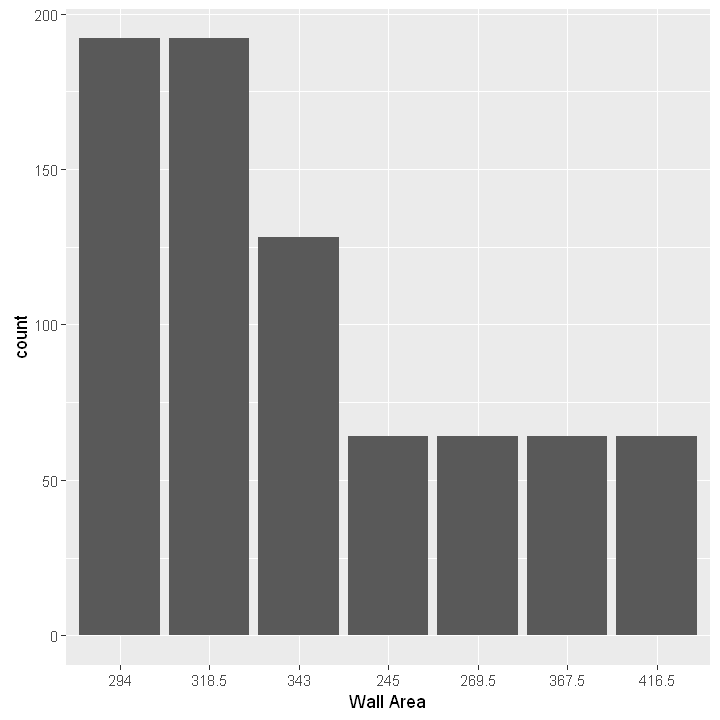

In [111]:
require(ggplot2)
ggplot(Cleansedenergy.ff, aes(x=reorder(Wall.Area,Wall.Area, function(x) -length(x)))) + ## Function shorts the bars
  geom_bar() + 
  xlab('Wall Area')
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) ## Theme function for conrol

Bar plot clearly shows you that wall area between 294 & 318.5 is most prevalent in the homes.

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values in each bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

Execute the code in the cell below to create a histogram using the `geom_histogram` function. 

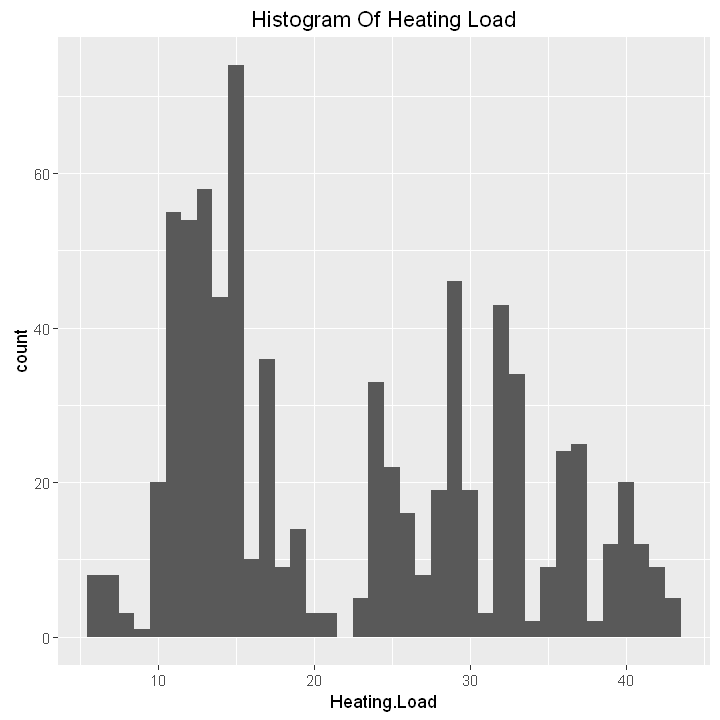

In [112]:
ggplot(Cleansedenergy.ff, aes(Heating.Load)) + geom_histogram(binwidth = 1) + 
  ggtitle('Histogram Of Heating Load')

The histogram shows Heating.Load with a skewed distribution.

Plot a histogram of z-score normalization of Heating.load and observe the distribution. A positive skewed distribution can be confirmed with a slope going down from -1 to 2. **<span style="color:blue">One can confirm that approximately 400 homes will be paying less than average heating bills.</span>**

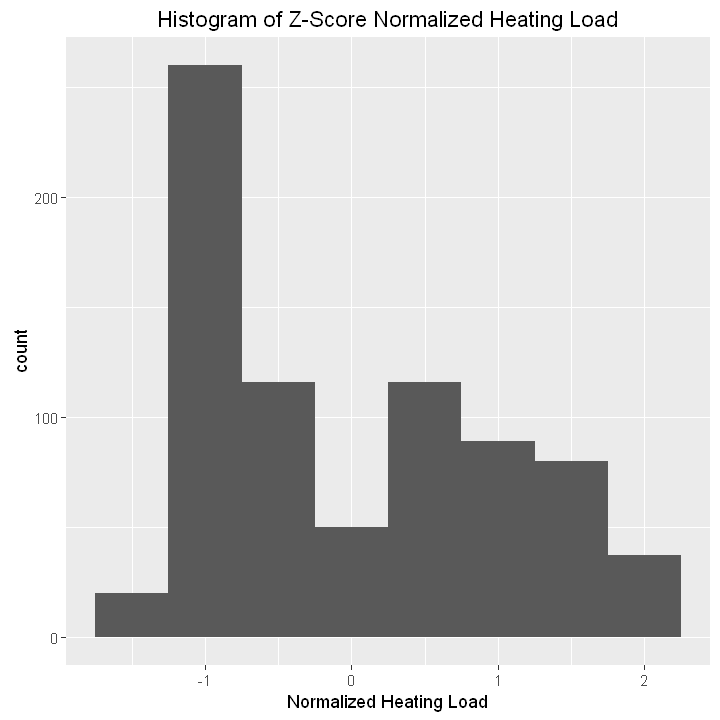

In [113]:
#Calculate z-score for Heating.load
zscore_heating <- scale(Cleansedenergy.ff$Heating.Load,center = TRUE, scale = TRUE)

#Create histogram for z-score of Heating Load
ggplot(Cleansedenergy.ff, aes(zscore_heating)) + geom_histogram(binwidth = .5) + 
  xlab('Normalized Heating Load') +
  ggtitle('Histogram of Z-Score Normalized Heating Load')

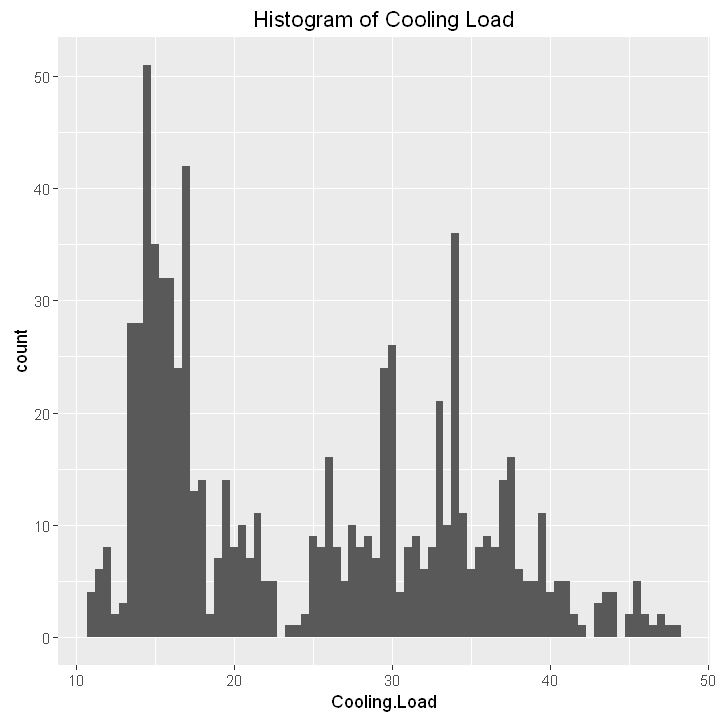

In [114]:
#Create histogram for Cooling.load
ggplot(Cleansedenergy.ff, aes(Cooling.Load)) + geom_histogram(binwidth = .5) + 
  ggtitle('Histogram of Cooling Load')

Plot a histogram of z-score normalized Cooling.load and observe the distribution. A positive skewed distribution can be confirmed with a slope going down from -1 to 2. **<span style="color:blue">One can confirm that approximately 393 homes will be paying less than average cooling bills.</span>**

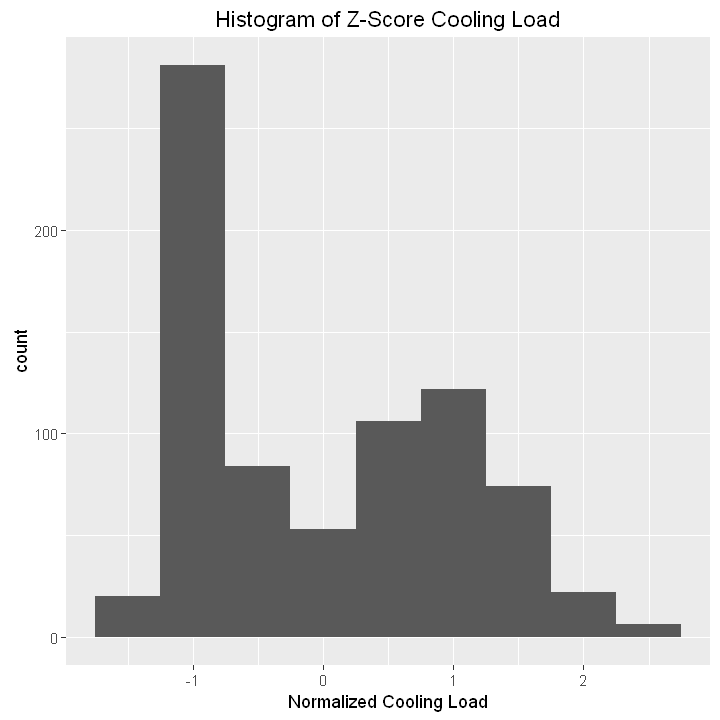

In [115]:
#calculate z-score for cooling.load
zscore_cooling <- scale(Cleansedenergy.ff$Cooling.Load,center = TRUE, scale = TRUE)
#Create histogram for z-score of cooling Load
ggplot(Cleansedenergy.ff, aes(zscore_cooling)) + geom_histogram(binwidth = .5) + 
  xlab('Normalized Cooling Load') +
  ggtitle('Histogram of Z-Score Cooling Load')

### Box plots

Box plots, also known as box and whisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

A diagram showing the interpretation of a box plot is shown in the figure below.

![Interpretation of a box plot](BoxPlot.png)

On a box plot the median value is shown with a dark bar. The inner two quartiles of data values are contained within the 'box'. The 'whiskers' enclose the majority of the data, at +/-1.5 times the inter-quartile range. Outliers are shown by symbols beyond the wiskers.

Several box plots can be stacked along an axis. The data are divided using a 'group by' operation, and the box plots for each group are stacked next to each other. In this way, the box plot allows you to display two dimensions of your data set. 

Execute the code in the cell below to create a box plot of the heating.load of homes.

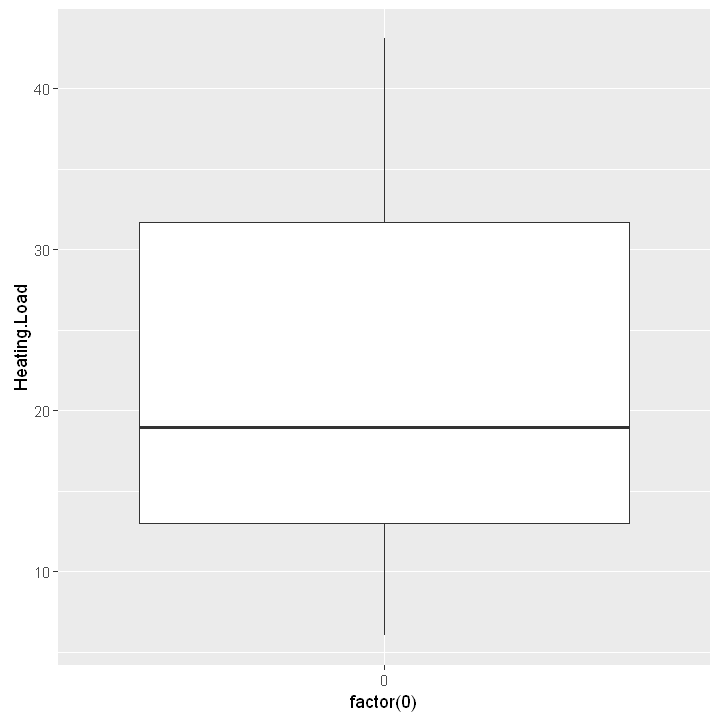

In [116]:
#Create boxplot for one variable
ggplot(Cleansedenergy.ff, aes(x = factor(0), y = Heating.Load )) + geom_boxplot()

Box plot of cooling load can now be compared with histogram of the normalized heating load. Z-score of heating load shows a downward slope from -1 to 2, box plot confirms this analysis by showing the median leaning towards the first quartile.

Box plots are most useful when the data are subdivided using another variable. In ggolot2 the you can add an x variable of **Overall Height** factor to perform this group by operation. Execute the code below to display the box plots of `Cooling.Load` grouped by the `Overall.Height` variable.

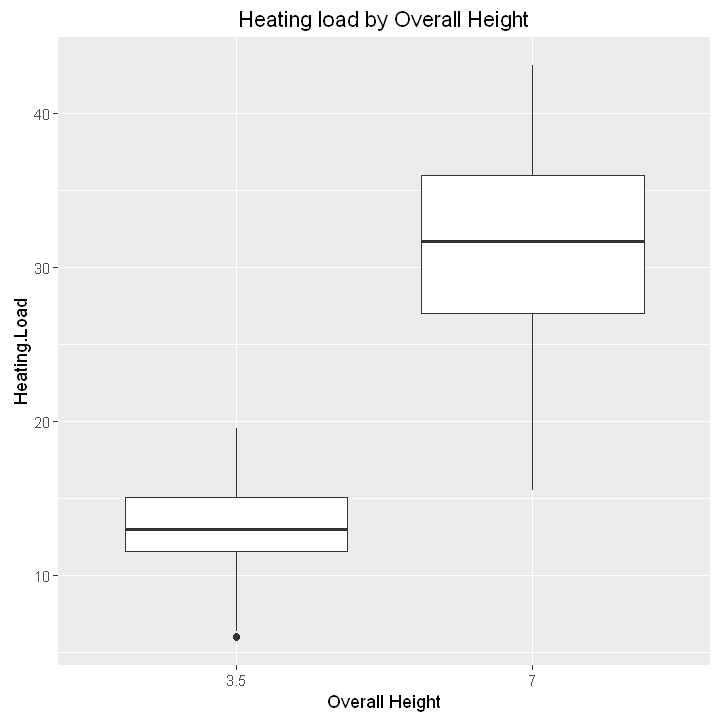

In [117]:
#Create boxplot to compare two variables.
ggplot(Cleansedenergy.ff, aes(x = factor(Overall.Height), y = Heating.Load)) + geom_boxplot() + 
  xlab('Overall Height') + ggtitle('Heating load by Overall Height')

Examine these box plots and note the following:

- One can clearly see a strong correlation between overall height and heating.load.
- The median heating load of a overall height of 3.5 is considerably less than overall height of 7. In other words homes with higher ceilings will have bigger heating bills.
- Overall Height of 3.5 has four outliers as compared to none in 7 when grouped by heating load. Outlier in 3.5 group would indicate atleast 4 homes below 1st quartile.
- There is no overlap between the interquartile ranges of heating load distributions of overall height of 3.5 & 7, this would convey that overall height of the house has a strong effect on the heating load as heating numbers are dramatically going up with the overall height.

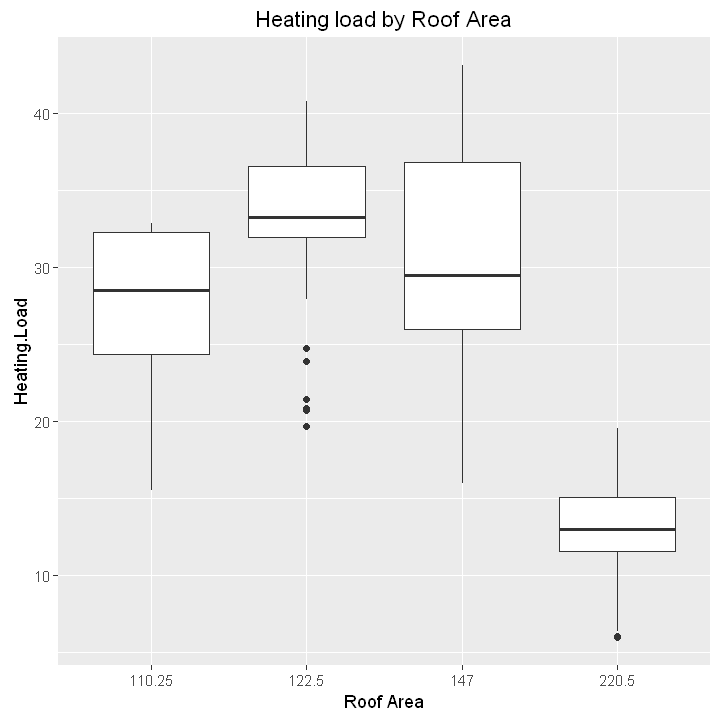

In [118]:
ggplot(Cleansedenergy.ff, aes(x = factor(Roof.Area), y = Heating.Load)) + geom_boxplot() + 
  xlab('Roof Area') + ggtitle('Heating load by Roof Area')

One can see that Roof Area has a negative correlation with heating loads.

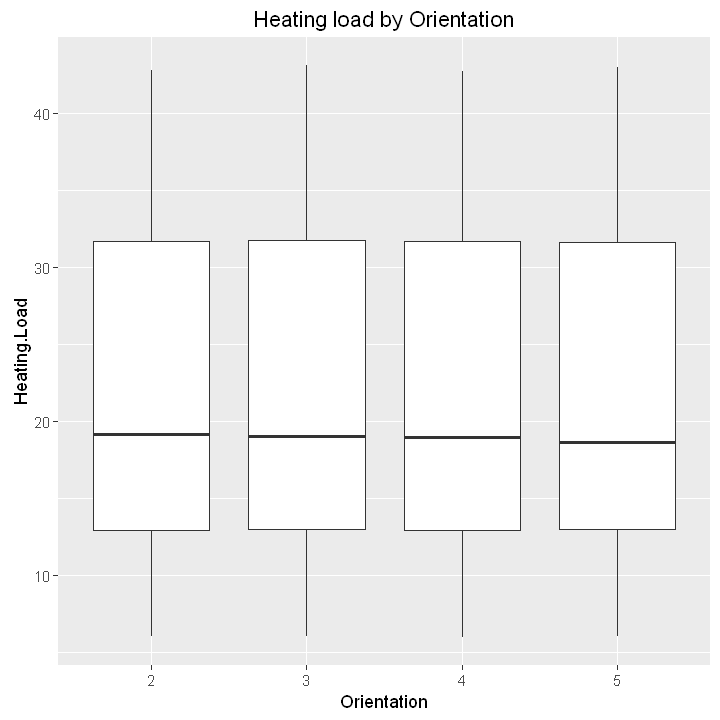

In [119]:
ggplot(Cleansedenergy.ff, aes(x = factor(Orientation), y = Heating.Load)) + geom_boxplot() + 
  xlab('Orientation') + ggtitle('Heating load by Orientation')

One can clearly see that Orientation has no correlation with heating loads.

### Kernel density estimation plots

You have used two methods for visualizing distributions. Now, you will look at another method, kernel density estimation. Kernel density estimation uses a moving denisty kernel to average the density of the distribution. Execute the code in the cell below to compute and plot a kernel density estimate of auto price. 

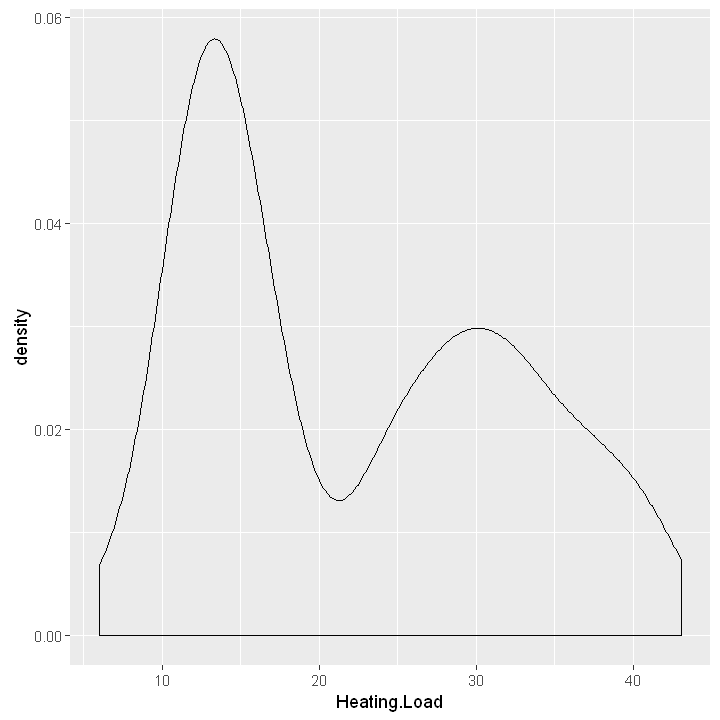

In [120]:
ggplot(Cleansedenergy.ff, aes(Heating.Load )) + geom_density()

Notice that the distribution is heavily skewed to the left with a small blip in the middle and then going down on the right.

### Violin plots

Violine plots are a useful, and relatively new, plot type. The violin plot combines some attributes of a kernal density plot and the box plot. The violin plot shows a pair of symmetric kernel density plot. Like a box plot, the violin plot can be conditioned on a categorical (factor) variable. 

The code in the cell below creates a violin plot of heating load, grouped by overall height. Some attributes have been added to show quantiles with the `draw_quantiles` attribute. Additionally, the `trim` attribute adds whiskers to show outliers. Execute this code to create the plot. 

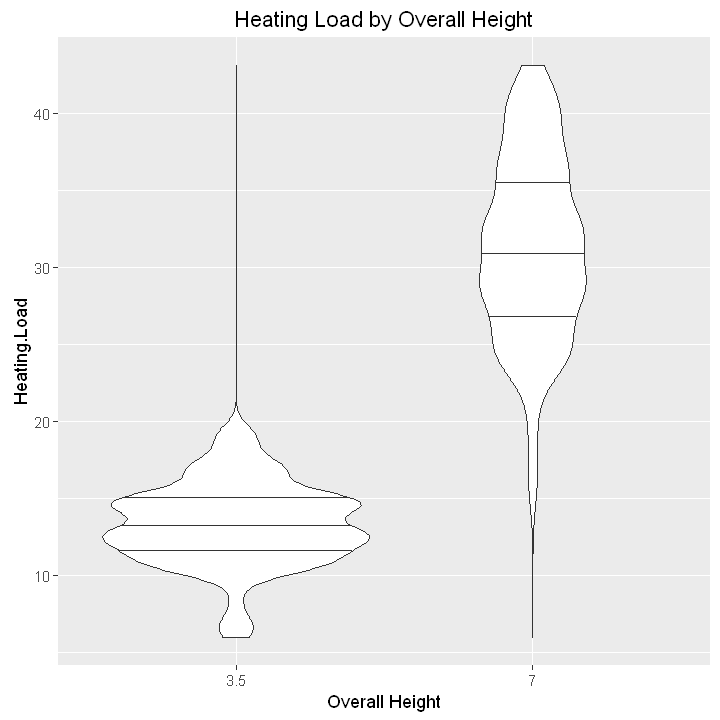

In [121]:
ggplot(Cleansedenergy.ff, aes(x = factor(Overall.Height), y = Heating.Load)) + 
    geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Overall Height')  + ggtitle('Heating Load by Overall Height')

This plot clearly shows a thick spread of **Heating.Load** on the 1st quartile of 3.5, one can also validate an even spread **Cooling.Load** between 1st and 3rd quartile of 7, with no outliers. 

**One would have however expected to see four outliers under the 1st Quartile on 3.5 and no outliers in 7.** 

**<span style="color:red">This would be a question to the professor.</span>**

Given below is a violin plot between heating load and orientation, we would expect to see no meaningful relationship in this plot.

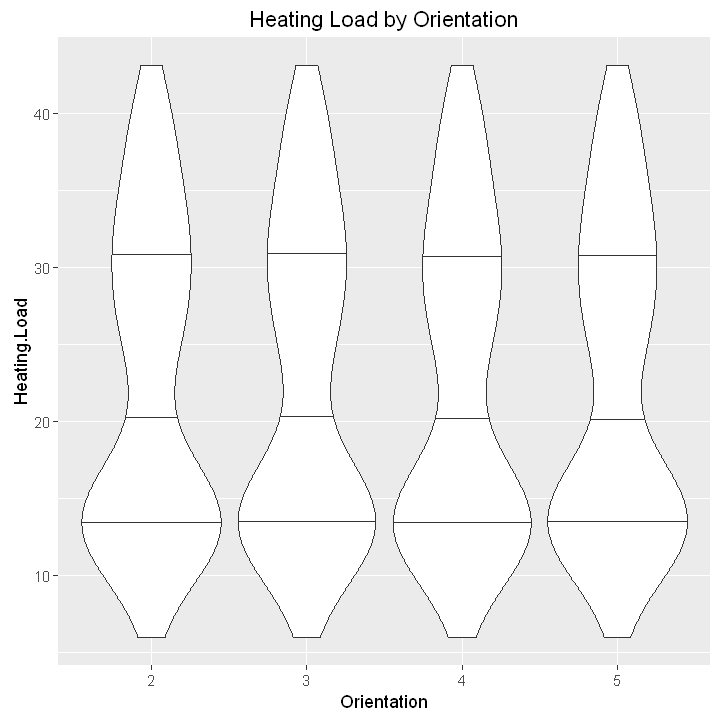

In [122]:
ggplot(Cleansedenergy.ff, aes(x = factor(Orientation), y = Heating.Load)) + 
  geom_violin(trim = FALSE, draw_quantiles = c(0.25, 0.5, 0.75)) +
  xlab('Orientation')  + ggtitle('Heating Load by Orientation')

As you can see above orientation has no bearing on heating load.

## Scatter plots

A basic scatter plot shows the relationship between two variables. Points are ploted at the x-y coordinates of each value pair. 

Execute the code in the cell below to create a scatter plot of `Overall.Height` on the horizontal axis vs. `Heating.Load` on the vertical axis. 

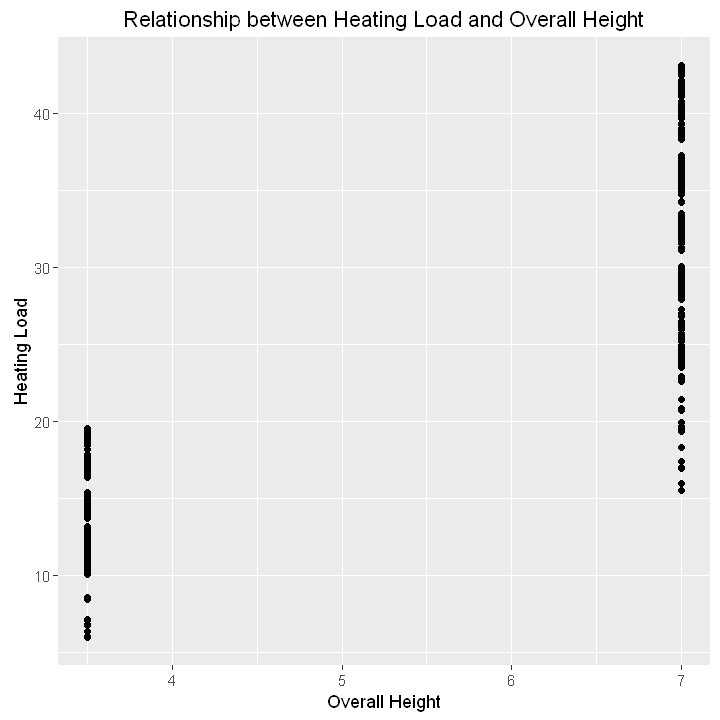

In [123]:
ggplot(Cleansedenergy.ff, aes(x = Overall.Height, y = Heating.Load)) + geom_point() + 
    xlab('Overall Height') + ylab('Heating Load') + 
    ggtitle('Relationship between Heating Load and Overall Height')

The scatter plot shows the relationship between Heating and Overall Height. The relationship clearly shows a higher heating load for homes with a higher overall height.

### 2D kernel density plot

A 2 dimensional kernel density plot works much like the 1 dimensional version we have already explored. A useful application is to overlay the 2D kernel density plot on a scatter plot. Execute the code below to create the plot.

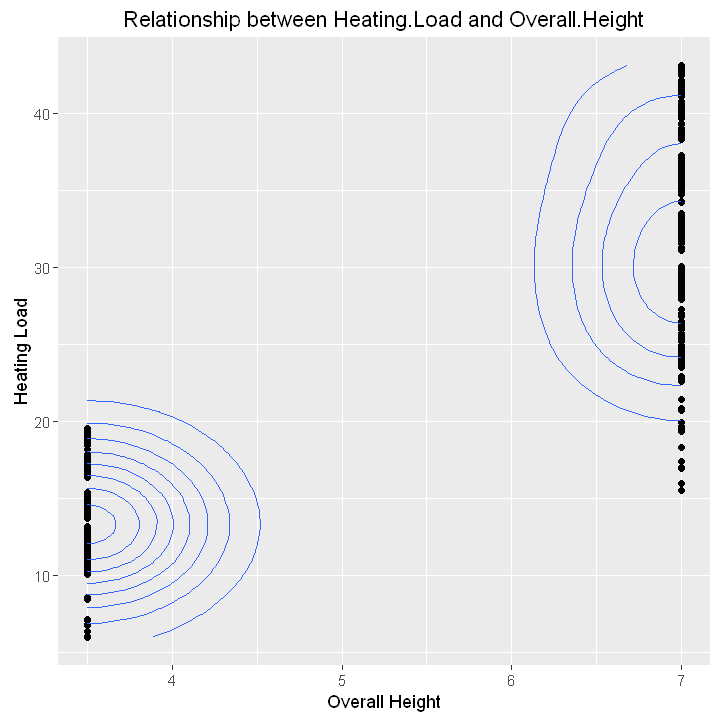

In [124]:
ggplot(Cleansedenergy.ff, aes(Overall.Height, Heating.Load)) + geom_point() + 
    geom_density2d() +
    xlab('Overall Height') + ylab('Heating Load') +
    ggtitle('Relationship between Heating.Load and Overall.Height')

The 2D kernel density estimate is shown using contours in this case. Other options are available. 

The groups of outliers are very prominent under both 3.5 & 7. There are however no outliers under 7.

**<span style="color:red">How do you explain the outliers under 7 ?</span>**

Hexbin plot

When you have a large number of data points to plot, over-plotting becomes a significant problem. When over-plotting occurs it is impossible to tell how many points are on top of each other. Several methods are available to deal with server overplotting.You have already explored one method for dealing with high point density, countour plotting.

Now, you will explore hexbin plots. Hexbin point density within hexagonal regions. The plot area can be divided into a selected number of bins both vertically or horizontally. Very high point density can be displayed with a hexbin plot.

Execute the code below to create a hexbin plot of Overall Height and Heating Load.


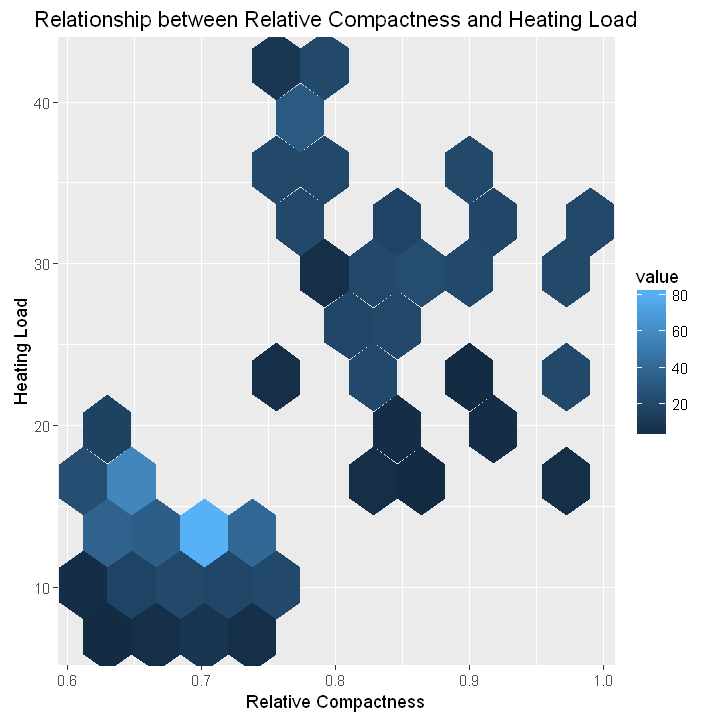

In [125]:
#Hexbin Plots
ggplot(Cleansedenergy.ff, aes(Relative.Compactness, Heating.Load)) + 
  stat_binhex(bins = 10) +
  xlab('Relative Compactness') + ylab('Heating Load') +
  ggtitle('Relationship between Relative Compactness and Heating Load')

- Once can see a good relation ship between Heating Load and relative compactness of the homes. As the compactness increases we do see an increase in the heatling load. 
- We can also see the highest density with homes with a compactness of .7 and heating load between 12-15.
- **<span style="color:red">One can also see four outliers on 0.79 & .9. There are outliers on .64, they are however not very clear as .7 to .74 has no outliers, they however all look the same.</span>**

### Line plots

Line plots are used to show the relationship between variables with ordered values. For example, line plots are used for time series data.

As a first step, you will create a pair of variables with ordered values by executing the code in the cell below.

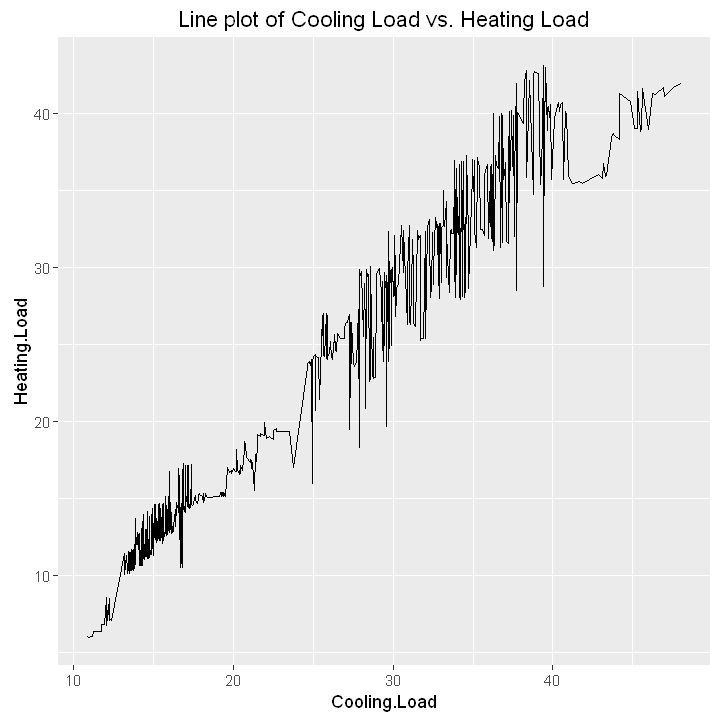

In [126]:
ggplot(Cleansedenergy.ff, aes(Cooling.Load, Heating.Load)) + geom_line() + ggtitle('Line plot of Cooling Load vs. Heating Load')

You can validate the linear relationship between cooling and heating load.

## View multiple dimensions with aesthetics

You have explored some basic plot types. All the plots you have created are projected onto a two dimensional surface. Thus, you have been limited to visualization of only two dimensions of the data set. 

Now, you will use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additonal dimensions onto a two dimensional plot surface. Additionally, carefull choice of plot aesthetics can highlight certain aspects of a data set you wish to present.   

There are many possible aesthetics one can use for visualization. Specific examples you will work with here include:

- Color
- Transparency
- Size
- Marker shape
- aspect ratio
- Aesthetics specific to plot type

Using aesthetics with a bit of cleverness can lead to interesting insights about a data set. Don't over do it! Too many colors, shapes and sizes can be confusing, obfuscating rather than enlightening. 

### Color

Color can be used to view an additional dimension on a scatter plot. A categorical factor can be shown using different colors for the different categories. 

*****
**Caution!** Make sure you use choose a palette with distinctive colors for each cateogry. Too many categories using similar colors are invariably hard to see and imposible to interpret. 
****

Execute the code in the cell below to display **Surface.Area** and a factor using the ``color`` argument in `aes` on a plot of Overall Height and Heating load.

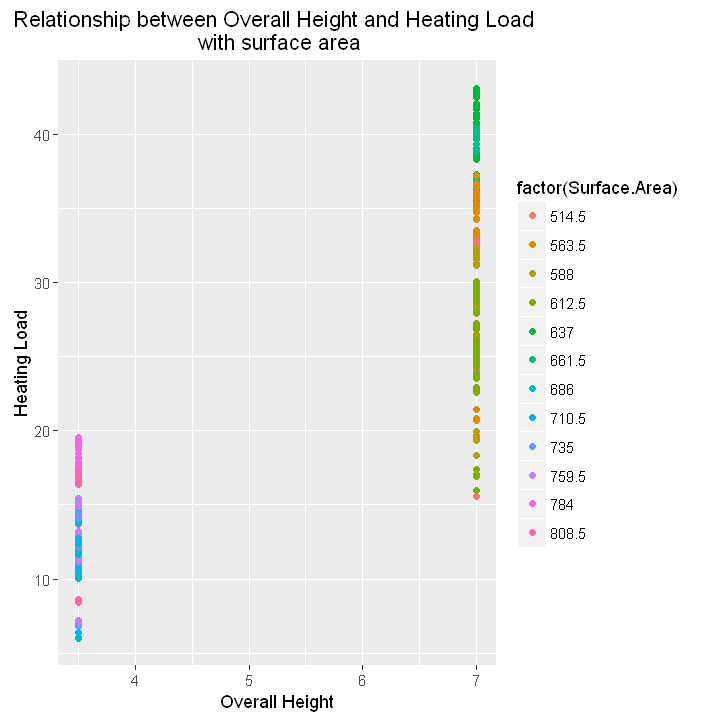

In [127]:
#scatter plot with more than two variables.
ggplot(Cleansedenergy.ff, aes(Overall.Height, Heating.Load)) + geom_point(aes(color = factor(Surface.Area))) + 
  xlab('Overall Height') + ylab('Heating Load') + 
  ggtitle('Relationship between Overall Height and Heating Load \n with surface area')

- Surface area has a negative correlation with Heating load and overall height has a strong positive correlation with Heating load. Plotting all three on the same plot now shows us a high surface area of 808.5 with a low heating load, and the same low heating load shows up on the low overall height due to strong positive correlation.

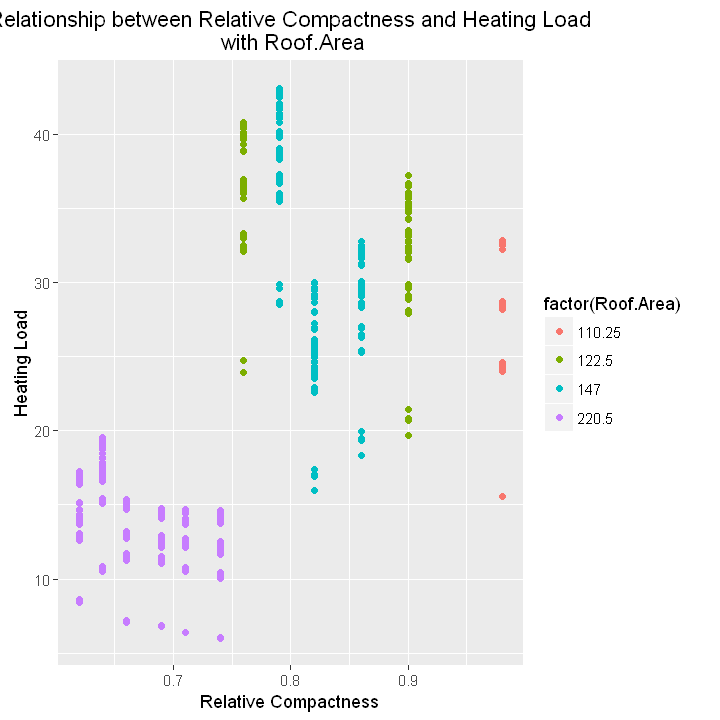

In [128]:
#scatter plot with more than two variables.
ggplot(Cleansedenergy.ff, aes(Relative.Compactness,Heating.Load)) + geom_point(aes(color = factor(Roof.Area))) + 
  xlab('Relative Compactness') + ylab('Heating Load') + 
  ggtitle('Relationship between Relative Compactness and Heating Load\n with Roof.Area')

- Relative compactness has a good correlation with Heating load and we can see heating load going up and as the compactness is increasing.
- Roof area has a negative correlation with heating load and it is evident on the plot with a higher roof area showing up against lower heating load.

### Marker size

Another aesthetic which can project an additional dimension onto a two dimensional plot is marker size. Execute the code in the cell below which uses the size of the marker to indicate overall height and color to indicate Roof Area.

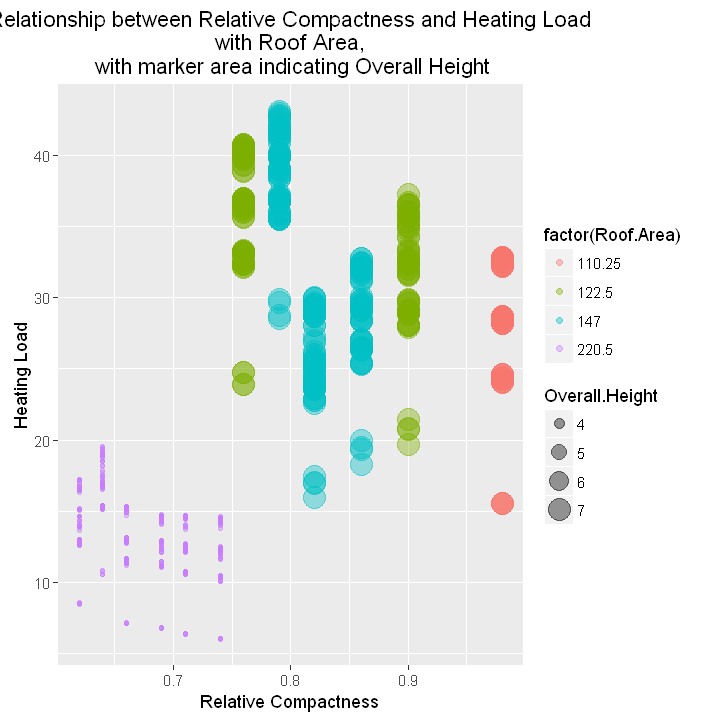

In [129]:
#Marker aesthetic
ggplot(Cleansedenergy.ff, aes(Relative.Compactness,Heating.Load)) + geom_point(aes(color = factor(Roof.Area), size = Overall.Height), alpha = 0.4) + 
  xlab('Relative Compactness') + ylab('Heating Load') + 
  ggtitle('Relationship between Relative Compactness and Heating Load\n with Roof Area, \n with marker area indicating Overall Height')

- Here we are plotting four different variables, Heating Load, Relative Compactness, Roof Area and Overall Height.
- Good correlation between heating load and relative compactness is evident.
- Roof area has a negative correlation with heating load and is evident by high heating load mapped against low roof area.
- Overall Height is strongly correlated with Heating load and one validate the small markers on low heating and bigger markers against high heating load.

### Correlation plots

The correlation structure of a multivariate data set can provide some useful insight. However, it is hard to derive much insight by just looking at the matrix of numbers. A visualization can be useful in getting an overall impression of which variables have siginificant correlation. 

R and its packages contain many functions for displaying a correlation matrix. A common method is to display the correlation matrix as a heat map. This is particually useful if you have a large number of variables in you data set. See for example the `corrgram` package.

We will look at other methods. The code below uses the `plotcorr` function from the `ellipse` package to plot the correlation ellipses. The length of the minor axis is computed as $1 - correlation$. A correlation of 1 gives a line, with the minor axis set to 0. Correlation of zero results in a circle. The intensity of the color used on the plot indicates the magnitude of the correlation. Additionally, orientation of the ellipse is used to highlight the positive or negative correlation value. For positive correlation the ellipse tilts right, with the oposite being true for negative correlation. 

                     Relative.Compactness Surface.Area  Wall.Area  Roof.Area
Relative.Compactness            1.0000000   -0.9919015 -0.2037817 -0.8688234
Surface.Area                   -0.9919015    1.0000000  0.1955016  0.8807195
Wall.Area                      -0.2037817    0.1955016  1.0000000 -0.2923165
Roof.Area                      -0.8688234    0.8807195 -0.2923165  1.0000000
Overall.Height                  0.8277473   -0.8581477  0.2809757 -0.9725122
Heating.Load                    0.6222722   -0.6581202  0.4556712 -0.8618283
Cooling.Load                    0.6343391   -0.6729989  0.4271170 -0.8625466
                     Overall.Height Heating.Load Cooling.Load
Relative.Compactness      0.8277473    0.6222722    0.6343391
Surface.Area             -0.8581477   -0.6581202   -0.6729989
Wall.Area                 0.2809757    0.4556712    0.4271170
Roof.Area                -0.9725122   -0.8618283   -0.8625466
Overall.Height            1.0000000    0.8894307    0.8957852
Heating.Load

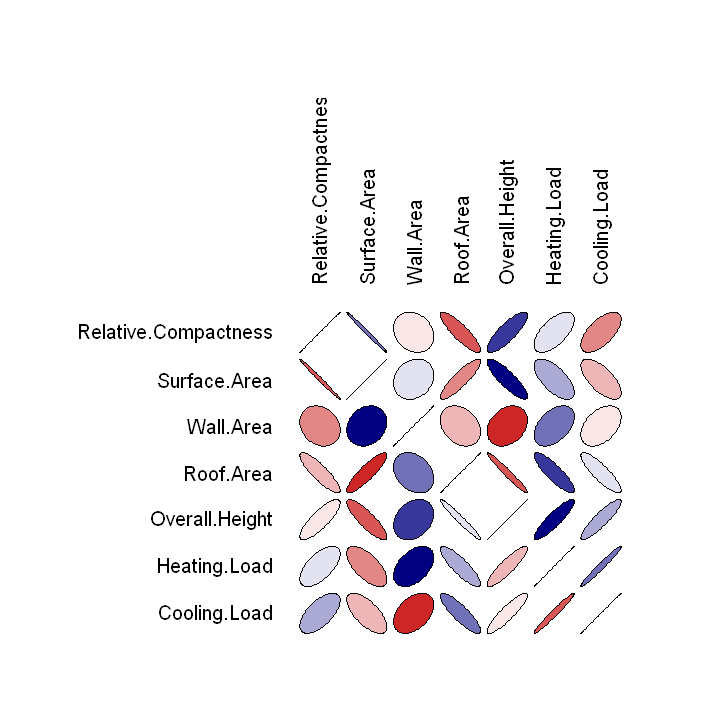

In [130]:
#Correlation Plot

options(repr.plot.width=6, repr.plot.height=6)
library(ellipse)
R = cor(Cleansedenergy.ff[, c('Relative.Compactness', 'Surface.Area', 'Wall.Area','Roof.Area', 'Overall.Height', 'Heating.Load', 'Cooling.Load')], method = 'pearson')
print(R)
plotcorr(R, col = colorRampPalette(c("firebrick3", "white", "navy"))(10))